## LOAD DATA

### MNIST Dataset

USPS train data: 60000
Training data shape: torch.Size([1, 16, 16])
USPS test data: 10000
Test data shape: torch.Size([1, 16, 16])


### USPS Dataset

USPS train data: 7291
Training data shape: torch.Size([1, 16, 16])
USPS test data: 2007
Test data shape: torch.Size([1, 16, 16])

			------------------------MNIST-----------------------------


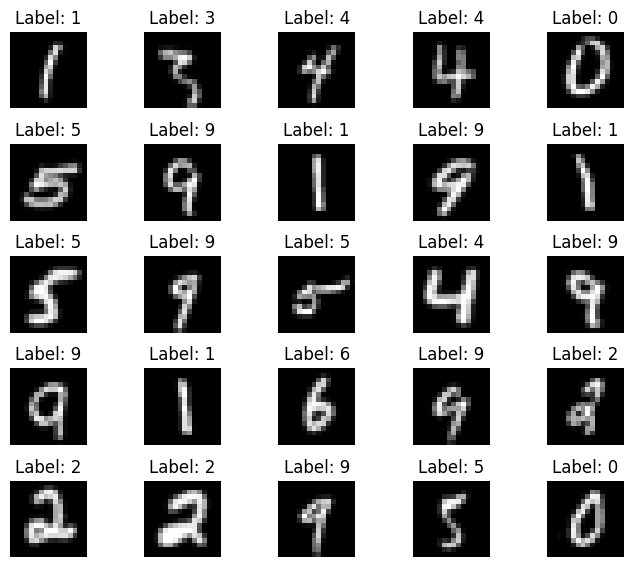


			---------------------USPS-----------------------------


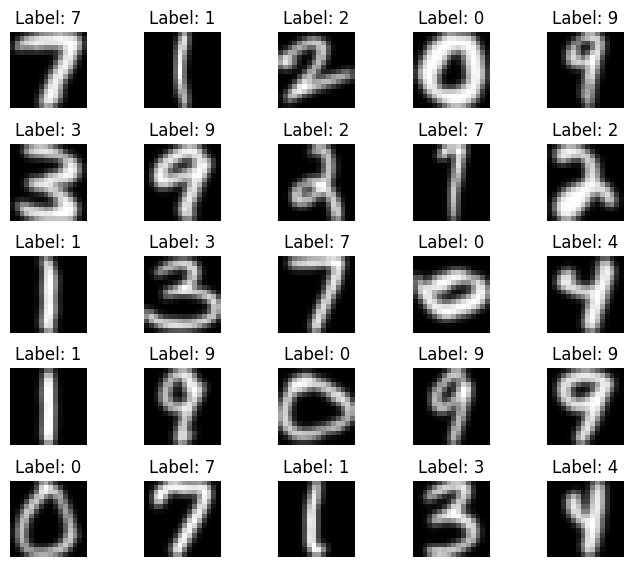

In [4]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from IPython.display import display, Markdown

from torch.utils.data import Dataset


# Reshape MNIST to 16x16

mnist_training_data = datasets.MNIST(
    root="data",
    train=True,
    download=False,
    transform=transforms.Compose( [transforms.Resize((16, 16)),  transforms.ToTensor()]) 
)



mnist_test_data = datasets.MNIST(
    root="data",
    train=False,
    download=False,
    transform=transforms.Compose( [transforms.Resize((16, 16)),  transforms.ToTensor()]) 
)


usps_training_data = datasets.USPS(
    root="data/USPS",
    train=True,
    download=False,
    transform=transforms.Compose( [transforms.Resize((16, 16)),  transforms.ToTensor()]) 
)


usps_test_data = datasets.USPS(
    root="data/USPS",
    train=False,
    download=False,
    transform=transforms.Compose( [transforms.Resize((16, 16)),  transforms.ToTensor()]) 
)


display(Markdown("### MNIST Dataset"))

print('USPS train data:', len(mnist_training_data))
print("Training data shape:", mnist_training_data[0][0].shape)

print('USPS test data:', len(mnist_test_data))
print("Test data shape:", mnist_test_data[0][0].shape)


display(Markdown("### USPS Dataset"))

print('USPS train data:', len(usps_training_data))
print("Training data shape:", usps_training_data[0][0].shape)

print('USPS test data:', len(usps_test_data))
print("Test data shape:", usps_test_data[0][0].shape)



print('\n\t\t\t------------------------MNIST-----------------------------')
fig, axes = plt.subplots(5, 5, figsize=(7, 6))

for ax in axes.flatten():
    i = np.random.randint(0, len(mnist_training_data))
    img, label = mnist_training_data[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()




print('\n\t\t\t---------------------USPS-----------------------------')
fig, axes = plt.subplots(5, 5, figsize=(7, 6))

for ax in axes.flatten():
    i = np.random.randint(0, len(usps_training_data))
    usps_img, usps_label = usps_training_data[i]
    ax.imshow(usps_img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {usps_label}')
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()




mnist_train_loader = DataLoader(mnist_training_data, batch_size=64,shuffle=True)
mnist_test_loader = DataLoader(mnist_test_data, batch_size=len(mnist_test_data))

usps_train_loader = DataLoader(usps_training_data, batch_size=64,shuffle=True)
usps_test_loader = DataLoader(usps_test_data, batch_size=len(usps_test_data))

In [2]:
mnist_train_loader.batch_size

64

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(16 * 8 * 8, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 8 * 8)
        x = self.fc(x)
        return x



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train(model, criterion, optimizer, train_loader, num_epochs=10):
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")



def evaluate(model, test_loader):
    model.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")




In [4]:
# mnist -> usps (source only train)
train(model, criterion, optimizer, mnist_train_loader, num_epochs=20)


Epoch [1/20], Loss: 0.4600
Epoch [2/20], Loss: 0.2001
Epoch [3/20], Loss: 0.1459
Epoch [4/20], Loss: 0.1160
Epoch [5/20], Loss: 0.0980
Epoch [6/20], Loss: 0.0865
Epoch [7/20], Loss: 0.0779
Epoch [8/20], Loss: 0.0712
Epoch [9/20], Loss: 0.0658
Epoch [10/20], Loss: 0.0620
Epoch [11/20], Loss: 0.0582
Epoch [12/20], Loss: 0.0550
Epoch [13/20], Loss: 0.0533
Epoch [14/20], Loss: 0.0502
Epoch [15/20], Loss: 0.0485
Epoch [16/20], Loss: 0.0464
Epoch [17/20], Loss: 0.0450
Epoch [18/20], Loss: 0.0433
Epoch [19/20], Loss: 0.0416
Epoch [20/20], Loss: 0.0412


In [5]:
# mnist -> usps (source only) 
evaluate(model, usps_test_loader)

Test Accuracy: 51.97%


#### t-SNE plot features non adapted

In [6]:
import torch
import numpy as np
from collections import defaultdict

def extract_features(loader, model, device, sample_fraction=0.1):
    model.eval()
    features = []
    labels = []
    
    # Initialize dictionaries to hold sampled data
    class_data = defaultdict(list)
    
    # Pass through loader to gather data
    for images, targets in loader:
        for image, target in zip(images, targets):
            class_data[target.item()].append(image)
    
    with torch.no_grad():
        for class_id, images in class_data.items():
            # Determine the number of samples to take
            num_samples = max(1, int(len(images) * sample_fraction))
            sampled_indices = np.random.choice(len(images), num_samples, replace=False)
            sampled_images = [images[idx] for idx in sampled_indices]

            # Create a mini-batch from the sampled images
            mini_batch = torch.stack(sampled_images).to(device)
            outputs = model(mini_batch)
            
            features.append(outputs.cpu().numpy())
            labels.extend([class_id] * num_samples)
    
    return np.concatenate(features), np.array(labels)



from sklearn.manifold import TSNE
# Function to apply t-SNE and plot
def plot_tsne(features, labels, domain_labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(features)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=domain_labels, cmap='tab10', alpha=0.7)
    plt.legend(handles=scatter.legend_elements()[0], labels=['MNIST', 'USPS'])
    plt.title(title)
    plt.show()



def prepare_features(features1, features2, labels1, labels2):
    features_combined = np.concatenate([features1, features2])
    labels_combined = np.concatenate([labels1, labels2])
    domain_labels_combined = np.concatenate([
        np.zeros(features1.shape[0]),  
        np.ones(features2.shape[0])     
    ])
    return features_combined, labels_combined, domain_labels_combined


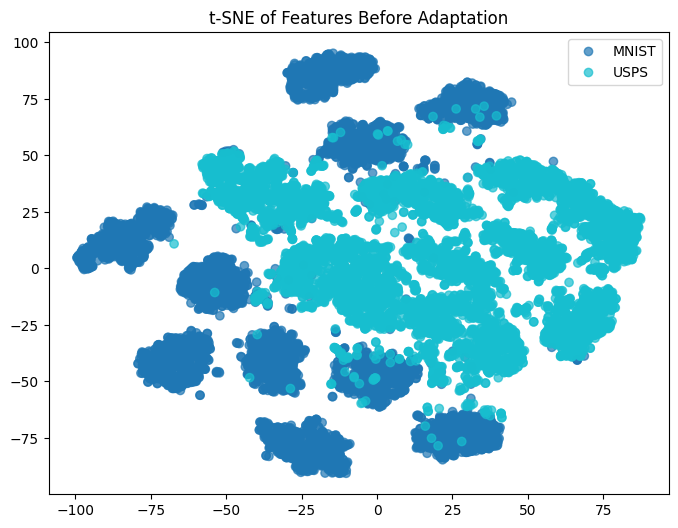

In [7]:
# mnist -> usps (source only) 
mnist_features_before, mnist_labels_before = extract_features(mnist_train_loader, model, device, sample_fraction = 0.1)
usps_features_before, usps_labels_before = extract_features(usps_train_loader, model, device, sample_fraction = 1.0)

features_before, labels_before, domain_labels_before = prepare_features(mnist_features_before, usps_features_before, mnist_labels_before, usps_labels_before)
plot_tsne(features_before, labels_before, domain_labels_before, 't-SNE of Features Before Adaptation')


In [8]:
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# usps -> mnist (source only)
train(model, criterion, optimizer, usps_train_loader, num_epochs=20)


Epoch [1/20], Loss: 1.1010
Epoch [2/20], Loss: 0.2911
Epoch [3/20], Loss: 0.2292
Epoch [4/20], Loss: 0.2009
Epoch [5/20], Loss: 0.1835
Epoch [6/20], Loss: 0.1740
Epoch [7/20], Loss: 0.1616
Epoch [8/20], Loss: 0.1495
Epoch [9/20], Loss: 0.1408
Epoch [10/20], Loss: 0.1336
Epoch [11/20], Loss: 0.1226
Epoch [12/20], Loss: 0.1192
Epoch [13/20], Loss: 0.1125
Epoch [14/20], Loss: 0.1072
Epoch [15/20], Loss: 0.1000
Epoch [16/20], Loss: 0.0972
Epoch [17/20], Loss: 0.0900
Epoch [18/20], Loss: 0.0852
Epoch [19/20], Loss: 0.0807
Epoch [20/20], Loss: 0.0764


In [9]:
# usps -> mnist
evaluate(model, mnist_test_loader)

Test Accuracy: 33.00%


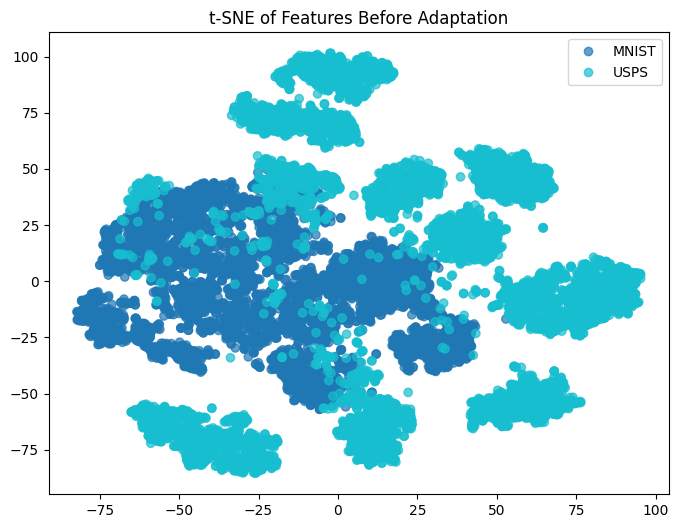

In [10]:
# usps -> mnist (source only) 
mnist_features_before, mnist_labels_before = extract_features(mnist_train_loader, model, device, sample_fraction = 0.1)
usps_features_before, usps_labels_before = extract_features(usps_train_loader, model, device, sample_fraction = 1.0)

features_before, labels_before, domain_labels_before = prepare_features(mnist_features_before, usps_features_before, mnist_labels_before, usps_labels_before)
plot_tsne(features_before, labels_before, domain_labels_before, 't-SNE of Features Before Adaptation')


## DANN

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d(1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(128)
        )

        self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)

class LabelClassifier(nn.Module):
    def __init__(self):
        super(LabelClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(64),
            nn.Linear(64, 10)
        )
        self._initialize_weights()

    def forward(self, x):
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0.0, 0.02)

class GradReverse(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lamda):
        ctx.lamda = lamda
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = (grad_output.neg() * ctx.lamda)
        return output, None

class DomainClassifier(nn.Module):
    def __init__(self):
        super(DomainClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(64),
            nn.Linear(64, 64),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(64),
            nn.Linear(64, 1)
        )
        self._initialize_weights()

    def forward(self, x, lam = 1.0):
        x = GradReverse.apply(x, lam)
        x = self.classifier(x)
        return torch.sigmoid(x)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0.0, 0.02)



In [12]:

feature_extractor = FeatureExtractor().to(device)
label_classifier = LabelClassifier().to(device)
domain_classifier = DomainClassifier().to(device)

optimizer_fe = torch.optim.Adam(feature_extractor.parameters(), lr=0.001)
optimizer_lc = torch.optim.Adam(label_classifier.parameters(), lr=0.001)
optimizer_dc = torch.optim.Adam(domain_classifier.parameters(), lr=0.001)

classification_loss_fn = nn.CrossEntropyLoss()
domain_loss_fn = nn.BCELoss()




def train_dann(num_epochs, data_source_loader, data_target_loader):
    feature_extractor.train()
    label_classifier.train()
    domain_classifier.train()

    for epoch in range(num_epochs):
        total_class_loss = 0
        total_domain_loss = 0
        for (src_images, src_labels), (tgt_images, _) in zip(data_source_loader, data_target_loader):
            src_images, src_labels = src_images.to(device), src_labels.to(device)
            tgt_images = tgt_images.to(device)


            src_features = feature_extractor(src_images)
            tgt_features = feature_extractor(tgt_images)

            class_preds = label_classifier(src_features)


            src_domain_labels = torch.ones(src_images.size(0), 1).to(device)
            tgt_domain_labels = torch.zeros(tgt_images.size(0), 1).to(device)
            domain_labels = torch.cat([src_domain_labels, tgt_domain_labels], 0)


            domain_preds = domain_classifier(torch.cat([src_features, tgt_features], 0), lam = 1.0)


            class_loss = classification_loss_fn(class_preds, src_labels)
            domain_loss = domain_loss_fn(domain_preds, domain_labels)


            loss = class_loss + domain_loss


            optimizer_fe.zero_grad()
            optimizer_lc.zero_grad()
            optimizer_dc.zero_grad()


            loss.backward()
            optimizer_fe.step()
            optimizer_lc.step()
            optimizer_dc.step()

            total_class_loss += class_loss.item()
            total_domain_loss += domain_loss.item()

        avg_class_loss = total_class_loss / len(data_source_loader)
        avg_domain_loss = total_domain_loss / len(data_source_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Classification Loss: {avg_class_loss:.4f}, Domain Loss: {avg_domain_loss:.4f}')





def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_misclassified_examples(images, true_labels, pred_labels, classes, num_examples=5):
    fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))
    for i in range(num_examples):
        image = images[i].permute(1, 2, 0).cpu().numpy()
        true_label = classes[true_labels[i]]
        pred_label = classes[pred_labels[i]]
        axes[i].imshow(image , cmap='gray')
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')
        axes[i].axis('off')
    plt.show()


                # test_loader
def evaluate(data_loader, classes):
    feature_extractor.eval()
    label_classifier.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            features = feature_extractor(images)
            outputs = label_classifier(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())


            misclassified_idx = (predicted != labels).nonzero(as_tuple=True)[0]
            for idx in misclassified_idx:
                misclassified_images.append(images[idx].cpu())
                misclassified_labels.append(labels[idx].cpu().item())
                misclassified_preds.append(predicted[idx].cpu().item())

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")


    cm = confusion_matrix(all_labels, all_preds)
    plot_confusion_matrix(cm, classes)
    plot_misclassified_examples(misclassified_images, misclassified_labels, misclassified_preds, classes, num_examples=5)


class_names = [str(i) for i in range(10)]




In [13]:
feature_extractor = FeatureExtractor().to(device)
label_classifier = LabelClassifier().to(device)
domain_classifier = DomainClassifier().to(device)

optimizer_fe = torch.optim.Adam(feature_extractor.parameters(), lr=0.001)
optimizer_lc = torch.optim.Adam(label_classifier.parameters(), lr=0.001)
optimizer_dc = torch.optim.Adam(domain_classifier.parameters(), lr=0.001)


# MNIST (source)-> USPS (target) 
train_dann(20, mnist_train_loader, usps_train_loader)

Epoch [1/20], Classification Loss: 0.1005, Domain Loss: 0.0840
Epoch [2/20], Classification Loss: 0.0233, Domain Loss: 0.0844
Epoch [3/20], Classification Loss: 0.0150, Domain Loss: 0.0834
Epoch [4/20], Classification Loss: 0.0107, Domain Loss: 0.0842
Epoch [5/20], Classification Loss: 0.0097, Domain Loss: 0.0841
Epoch [6/20], Classification Loss: 0.0085, Domain Loss: 0.0845
Epoch [7/20], Classification Loss: 0.0078, Domain Loss: 0.0839
Epoch [8/20], Classification Loss: 0.0077, Domain Loss: 0.0841
Epoch [9/20], Classification Loss: 0.0077, Domain Loss: 0.0837
Epoch [10/20], Classification Loss: 0.0069, Domain Loss: 0.0838
Epoch [11/20], Classification Loss: 0.0070, Domain Loss: 0.0840
Epoch [12/20], Classification Loss: 0.0069, Domain Loss: 0.0834
Epoch [13/20], Classification Loss: 0.0083, Domain Loss: 0.0843
Epoch [14/20], Classification Loss: 0.0054, Domain Loss: 0.0839
Epoch [15/20], Classification Loss: 0.0057, Domain Loss: 0.0837
Epoch [16/20], Classification Loss: 0.0053, Domai

Test Accuracy: 83.91%


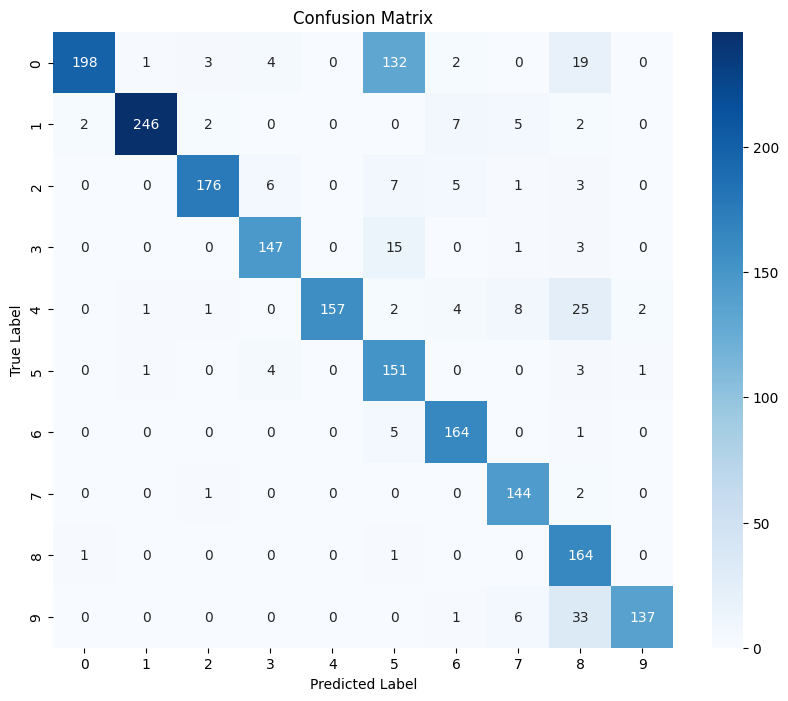

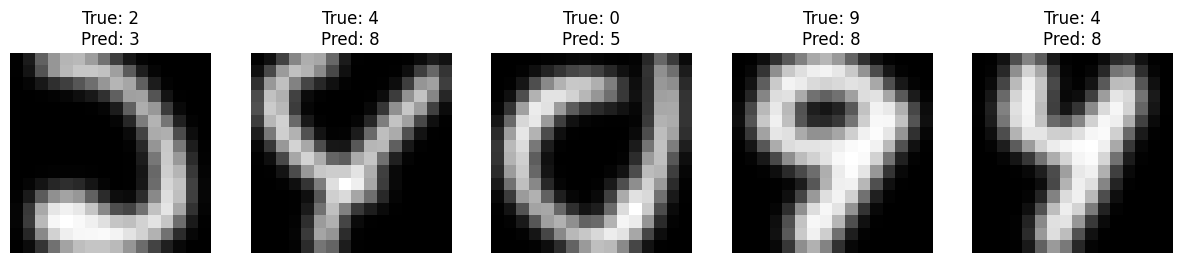

In [14]:
# evaluate on target test set
evaluate(usps_test_loader, class_names)

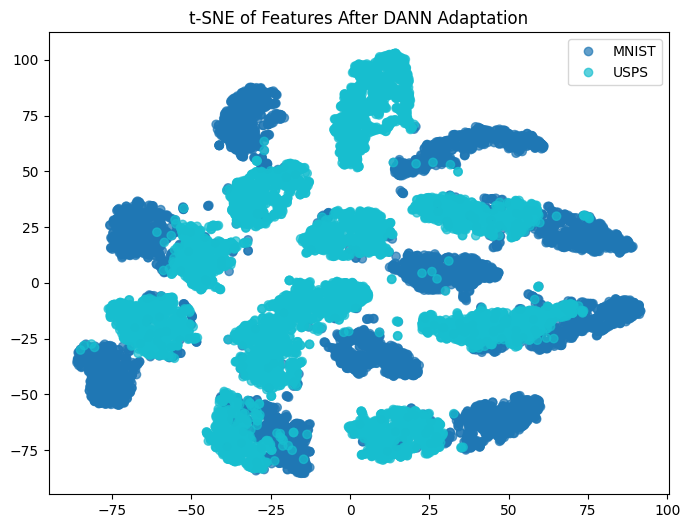

In [15]:
# mnist -> usps
mnist_features_after, mnist_labels_after = extract_features(mnist_train_loader, feature_extractor, device, sample_fraction = 0.1)
usps_features_after, usps_labels_after = extract_features(usps_train_loader, feature_extractor, device, sample_fraction = 1.0)

features_after, labels_after, domain_labels_after = prepare_features(mnist_features_after, usps_features_after, mnist_labels_after, usps_labels_after)
plot_tsne(features_after, labels_after, domain_labels_after, 't-SNE of Features After DANN Adaptation')


#### USPS (source) -> MNIST (target)

In [16]:
feature_extractor = FeatureExtractor().to(device)
label_classifier = LabelClassifier().to(device)
domain_classifier = DomainClassifier().to(device)

optimizer_fe = torch.optim.Adam(feature_extractor.parameters(), lr=0.001)
optimizer_lc = torch.optim.Adam(label_classifier.parameters(), lr=0.001)
optimizer_dc = torch.optim.Adam(domain_classifier.parameters(), lr=0.001)


# USPS (source) -> MNIST (target)
train_dann(20, usps_train_loader, mnist_train_loader)

Epoch [1/20], Classification Loss: 0.6848, Domain Loss: 0.6733
Epoch [2/20], Classification Loss: 0.1460, Domain Loss: 0.6900
Epoch [3/20], Classification Loss: 0.0763, Domain Loss: 0.6883
Epoch [4/20], Classification Loss: 0.0587, Domain Loss: 0.6915
Epoch [5/20], Classification Loss: 0.0420, Domain Loss: 0.6894
Epoch [6/20], Classification Loss: 0.0298, Domain Loss: 0.6861
Epoch [7/20], Classification Loss: 0.0403, Domain Loss: 0.6921
Epoch [8/20], Classification Loss: 0.0293, Domain Loss: 0.6948
Epoch [9/20], Classification Loss: 0.0230, Domain Loss: 0.6937
Epoch [10/20], Classification Loss: 0.0227, Domain Loss: 0.6862
Epoch [11/20], Classification Loss: 0.0179, Domain Loss: 0.7030
Epoch [12/20], Classification Loss: 0.0188, Domain Loss: 0.6919
Epoch [13/20], Classification Loss: 0.0193, Domain Loss: 0.6960
Epoch [14/20], Classification Loss: 0.0147, Domain Loss: 0.6937
Epoch [15/20], Classification Loss: 0.0084, Domain Loss: 0.6921
Epoch [16/20], Classification Loss: 0.0121, Domai

Test Accuracy: 92.02%


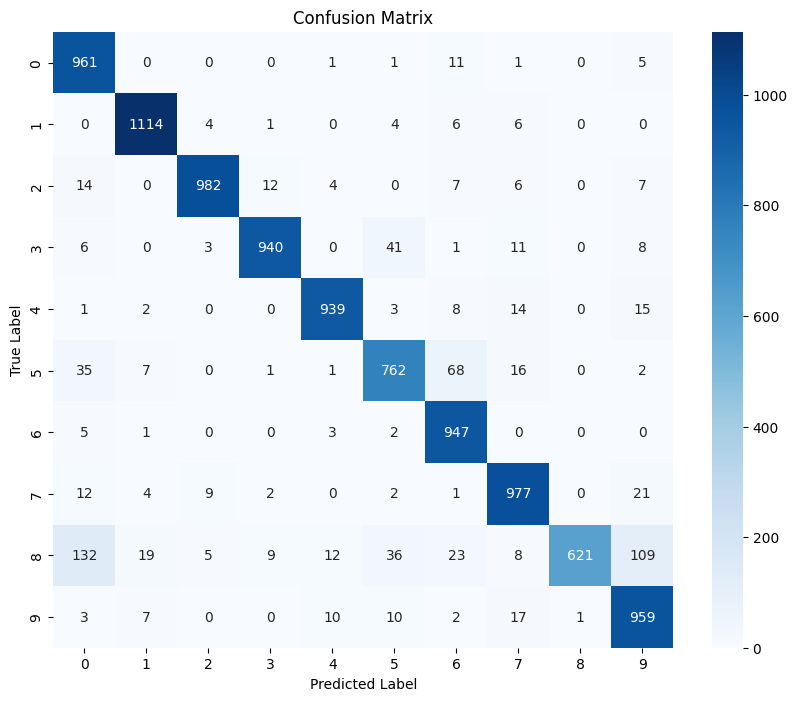

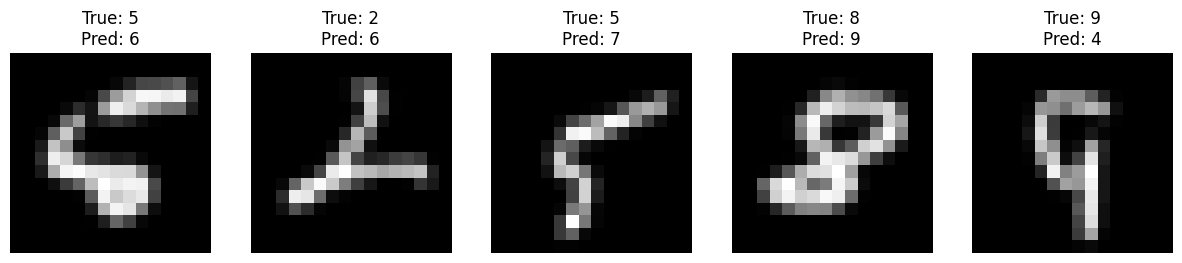

In [17]:
evaluate(mnist_test_loader, class_names)

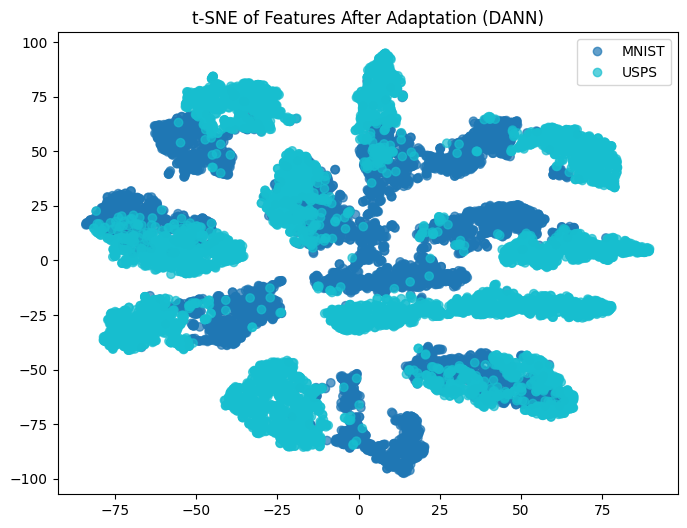

In [18]:
# usps -> mnist
mnist_features_after, mnist_labels_after = extract_features(mnist_train_loader, feature_extractor, device, sample_fraction = 0.1)
usps_features_after, usps_labels_after = extract_features(usps_train_loader, feature_extractor, device, sample_fraction = 1.0)

features_after, labels_after, domain_labels_after = prepare_features(mnist_features_after, usps_features_after, mnist_labels_after, usps_labels_after)
plot_tsne(features_after, labels_after, domain_labels_after, 't-SNE of Features After Adaptation (DANN)')


## CORAL 

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset


def coral_loss(source, target):
    d = source.size(1)
    source_cov = torch.mm((source - torch.mean(source, 0)).t(), (source - torch.mean(source, 0))) / (source.size(0) - 1)
    target_cov = torch.mm((target - torch.mean(target, 0)).t(), (target - torch.mean(target, 0))) / (target.size(0) - 1)
    loss = torch.mean(torch.mul((source_cov - target_cov), (source_cov - target_cov)))
    loss /= (4 * d * d)
    return loss


class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d(1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(128)
        )

        self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)

class LabelClassifier(nn.Module):
    def __init__(self):
        super(LabelClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(64),
            nn.Linear(64, 10)
        )
        self._initialize_weights()

    def forward(self, x):
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0.0, 0.02)

class GradReverse(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambd):
        ctx.lambd = lambd
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg() * ctx.lambd, None

class DomainClassifier(nn.Module):
    def __init__(self):
        super(DomainClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.BatchNorm1d(64),
            nn.Linear(64, 1)
        )
        self._initialize_weights()

    def forward(self, x, lambd=0.0):
        x = GradReverse.apply(x, lambd) # apply GradReverse
        x = self.classifier(x)
        return torch.sigmoid(x)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0.0, 0.02)


feature_extractor = FeatureExtractor().to(device)
label_classifier = LabelClassifier().to(device)
domain_classifier = DomainClassifier().to(device)


optimizer_fe = torch.optim.Adam(feature_extractor.parameters(), lr=0.0001)
optimizer_lc = torch.optim.Adam(label_classifier.parameters(), lr=0.0001)
optimizer_dc = torch.optim.Adam(domain_classifier.parameters(), lr=0.0001)



classification_loss_fn = nn.CrossEntropyLoss()
domain_loss_fn = nn.BCELoss()


def train_with_coral(num_epochs, src_loader, tgt_loader):
    feature_extractor.train()
    label_classifier.train()
    domain_classifier.train()

    for epoch in range(num_epochs):
        total_class_loss = 0
        total_domain_loss = 0
        total_coral_loss = 0

        src_iter = iter(src_loader)
        tgt_iter = iter(tgt_loader)
        num_batches = min(len(src_iter), len(tgt_iter))

        for _ in range(num_batches):
            src_images, src_labels = next(src_iter)
            tgt_images, _ = next(tgt_iter)

            src_images, src_labels = src_images.to(device), src_labels.to(device)
            tgt_images = tgt_images.to(device)


            src_features = feature_extractor(src_images)
            tgt_features = feature_extractor(tgt_images)

            class_preds = label_classifier(src_features)
            domain_preds_src = domain_classifier(src_features, lambd=1.0)
            domain_preds_tgt = domain_classifier(tgt_features, lambd=1.0)


            domain_labels_src = torch.ones(src_images.size(0), 1).to(device)
            domain_labels_tgt = torch.zeros(tgt_images.size(0), 1).to(device)


            class_loss = classification_loss_fn(class_preds, src_labels)
            coral_loss_val = coral_loss(src_features, tgt_features)
            domain_loss_src = domain_loss_fn(domain_preds_src, domain_labels_src)
            domain_loss_tgt = domain_loss_fn(domain_preds_tgt, domain_labels_tgt)


            domain_loss = 0.5 * (domain_loss_src + domain_loss_tgt)
            total_loss = class_loss + coral_loss_val + domain_loss


            optimizer_fe.zero_grad()
            optimizer_lc.zero_grad()
            optimizer_dc.zero_grad()


            total_loss.backward()
            optimizer_fe.step()
            optimizer_lc.step()
            optimizer_dc.step()

            total_class_loss += class_loss.item()
            total_domain_loss += domain_loss.item()
            total_coral_loss += coral_loss_val.item()

        avg_class_loss = total_class_loss / num_batches
        avg_domain_loss = total_domain_loss / num_batches
        avg_coral_loss = total_coral_loss / num_batches

        print(f'Epoch [{epoch+1}/{num_epochs}], Classification Loss: {avg_class_loss:.4f}, Domain Loss: {avg_domain_loss:.4f}')

def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            features = feature_extractor(images)
            outputs = label_classifier(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")





In [20]:
# mnist -> usps
train_with_coral(20, mnist_train_loader, usps_train_loader) 


Epoch [1/20], Classification Loss: 1.8678, Domain Loss: 0.6959
Epoch [2/20], Classification Loss: 1.2300, Domain Loss: 0.6944
Epoch [3/20], Classification Loss: 0.8194, Domain Loss: 0.6938
Epoch [4/20], Classification Loss: 0.5572, Domain Loss: 0.6935
Epoch [5/20], Classification Loss: 0.4024, Domain Loss: 0.6933
Epoch [6/20], Classification Loss: 0.3032, Domain Loss: 0.6933
Epoch [7/20], Classification Loss: 0.2373, Domain Loss: 0.6932
Epoch [8/20], Classification Loss: 0.1878, Domain Loss: 0.6932
Epoch [9/20], Classification Loss: 0.1571, Domain Loss: 0.6932
Epoch [10/20], Classification Loss: 0.1351, Domain Loss: 0.6932
Epoch [11/20], Classification Loss: 0.1190, Domain Loss: 0.6932
Epoch [12/20], Classification Loss: 0.1027, Domain Loss: 0.6931
Epoch [13/20], Classification Loss: 0.0926, Domain Loss: 0.6931
Epoch [14/20], Classification Loss: 0.0849, Domain Loss: 0.6931
Epoch [15/20], Classification Loss: 0.0721, Domain Loss: 0.6931
Epoch [16/20], Classification Loss: 0.0642, Domai

Test Accuracy: 82.81%


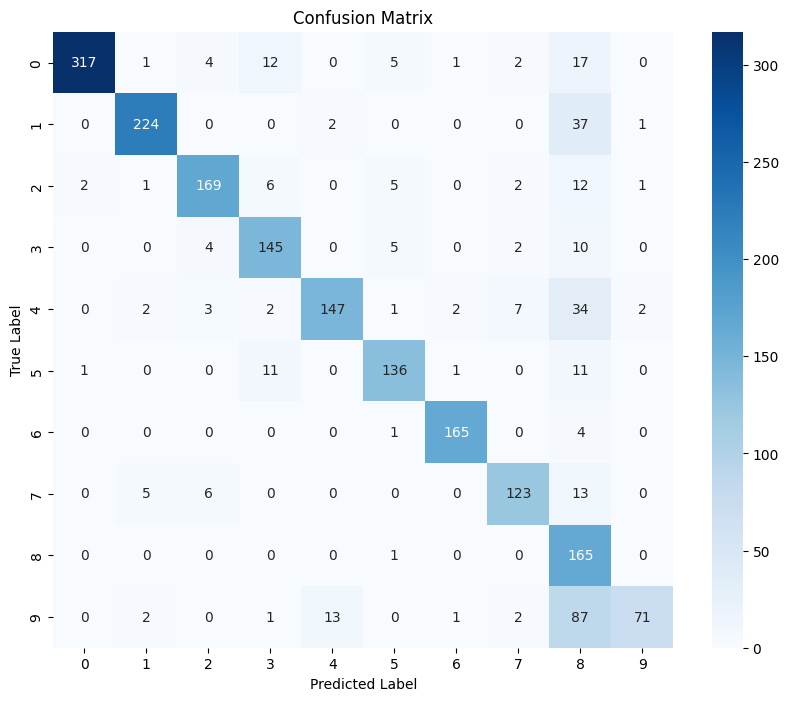

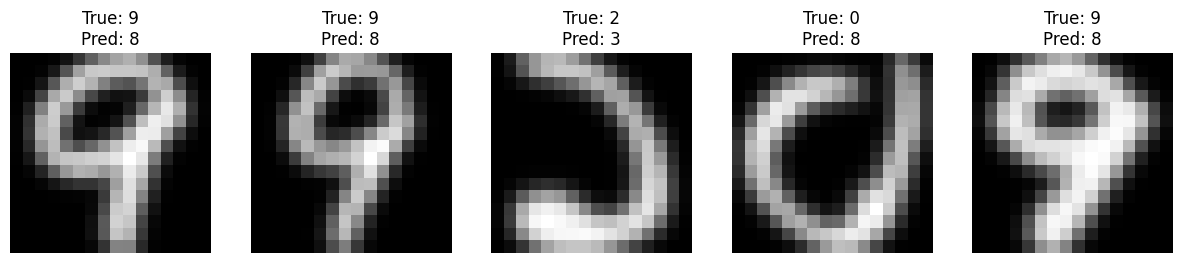

In [21]:

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_and_plot_confusion_matrix(feature_extractor, label_classifier, test_loader, classes):
    feature_extractor.eval()
    label_classifier.eval()

    all_preds = []
    all_labels = []


    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            features = feature_extractor(images)
            outputs = label_classifier(features)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")


    cm = confusion_matrix(all_labels, all_preds)


    plot_confusion_matrix(cm, classes)

def plot_misclassified_examples(feature_extractor, label_classifier, test_loader, classes, num_examples=5):
    feature_extractor.eval()
    label_classifier.eval()

    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            features = feature_extractor(images)
            outputs = label_classifier(features)
            _, predicted = torch.max(outputs, 1)

            misclassified_idx = (predicted != labels).nonzero(as_tuple=True)[0]
            for idx in misclassified_idx:
                if len(misclassified_images) < num_examples:
                    misclassified_images.append(images[idx].cpu())
                    misclassified_labels.append(labels[idx].cpu().item())
                    misclassified_preds.append(predicted[idx].cpu().item())
                else:
                    break

    fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))
    for i in range(num_examples):
        image = misclassified_images[i].permute(1, 2, 0).numpy() / 2 + 0.5  # Unnormalize
        true_label = classes[misclassified_labels[i]]
        pred_label = classes[misclassified_preds[i]]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')
        axes[i].axis('off')

    plt.show()

class_names = [str(i) for i in range(10)]


evaluate_and_plot_confusion_matrix(feature_extractor, label_classifier, usps_test_loader, class_names)


plot_misclassified_examples(feature_extractor, label_classifier, usps_test_loader, class_names)

In [23]:
feature_extractor = FeatureExtractor().to(device)
label_classifier = LabelClassifier().to(device)
domain_classifier = DomainClassifier().to(device)


optimizer_fe = torch.optim.Adam(feature_extractor.parameters(), lr=0.0001)
optimizer_lc = torch.optim.Adam(label_classifier.parameters(), lr=0.0001)
optimizer_dc = torch.optim.Adam(domain_classifier.parameters(), lr=0.0001)


In [24]:
# usps -> mnist
train_with_coral(20, usps_train_loader ,mnist_train_loader ) 


Epoch [1/20], Classification Loss: 1.6742, Domain Loss: 0.6964
Epoch [2/20], Classification Loss: 1.0533, Domain Loss: 0.6950
Epoch [3/20], Classification Loss: 0.6877, Domain Loss: 0.6943
Epoch [4/20], Classification Loss: 0.4577, Domain Loss: 0.6940
Epoch [5/20], Classification Loss: 0.3170, Domain Loss: 0.6937
Epoch [6/20], Classification Loss: 0.2246, Domain Loss: 0.6936
Epoch [7/20], Classification Loss: 0.1655, Domain Loss: 0.6935
Epoch [8/20], Classification Loss: 0.1253, Domain Loss: 0.6934
Epoch [9/20], Classification Loss: 0.0969, Domain Loss: 0.6933
Epoch [10/20], Classification Loss: 0.0773, Domain Loss: 0.6933
Epoch [11/20], Classification Loss: 0.0624, Domain Loss: 0.6932
Epoch [12/20], Classification Loss: 0.0506, Domain Loss: 0.6932
Epoch [13/20], Classification Loss: 0.0422, Domain Loss: 0.6932
Epoch [14/20], Classification Loss: 0.0356, Domain Loss: 0.6932
Epoch [15/20], Classification Loss: 0.0319, Domain Loss: 0.6932
Epoch [16/20], Classification Loss: 0.0285, Domai

Test Accuracy: 60.80%


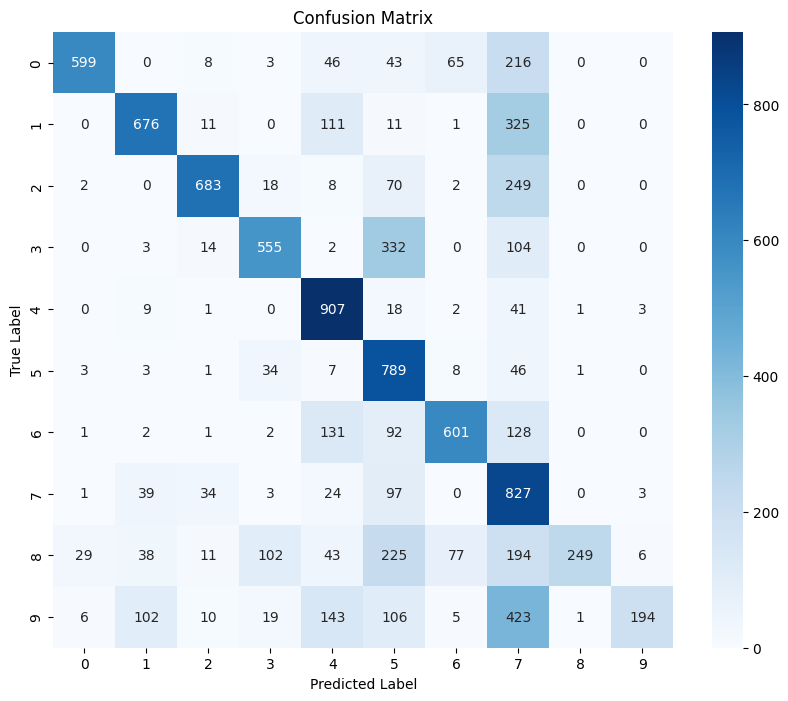

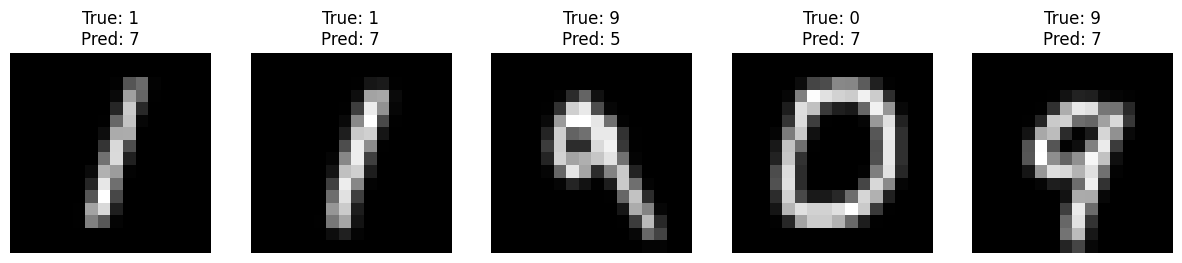

In [25]:
evaluate_and_plot_confusion_matrix(feature_extractor, label_classifier, mnist_test_loader, class_names)


plot_misclassified_examples(feature_extractor, label_classifier, mnist_test_loader, class_names)